<a href="https://colab.research.google.com/github/wolego2uni/projects/blob/main/haircoloursubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****HAIR COLOUR CLASSIFICATION (MULTI IMAGE CLASSIFICATION USING CNN)****

# **Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import tensorflow as tf
from keras.utils import normalize, to_categorical
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the image annotations 
df = pd.read_csv('coursework.csv')

In [ ]:
dirFiles = os.listdir('/content/drive/My Drive/emotionet_3/continue/')
dirFiles.sort(key=lambda f: int(re.sub('\D', '', f)))
dirFiles

['emotionet_3_28.jpg',
 'emotionet_3_54.jpg',
 'emotionet_3_82.jpg',
 'emotionet_3_85.jpg',
 'emotionet_3_161.jpg',
 'emotionet_3_271.jpg',
 'emotionet_3_276.jpg',
 'emotionet_3_320.jpg',
 'emotionet_3_329.jpg',
 'emotionet_3_352.jpg',
 'emotionet_3_383.jpg',
 'emotionet_3_424.jpg',
 'emotionet_3_456.jpg',
 'emotionet_3_458.jpg',
 'emotionet_3_507.jpg',
 'emotionet_3_748.jpg',
 'emotionet_3_790.jpg',
 'emotionet_3_799.jpg',
 'emotionet_3_856.jpg',
 'emotionet_3_887.jpg',
 'emotionet_3_909.jpg',
 'emotionet_3_975.jpg',
 'emotionet_3_1029.jpg',
 'emotionet_3_1052.jpg',
 'emotionet_3_1083.jpg',
 'emotionet_3_1084.jpg',
 'emotionet_3_1178.jpg',
 'emotionet_3_1345.jpg',
 'emotionet_3_1499.jpg',
 'emotionet_3_1672.jpg',
 'emotionet_3_1723.jpg',
 'emotionet_3_1724.jpg',
 'emotionet_3_1789.jpg',
 'emotionet_3_1841.jpg',
 'emotionet_3_1846.jpg',
 'emotionet_3_1890.jpg',
 'emotionet_3_1965.jpg',
 'emotionet_3_2011.jpg',
 'emotionet_3_2018.jpg',
 'emotionet_3_2306.jpg',
 'emotionet_3_2470.jpg',
 

In [ ]:
#importing the images 
dir_struct = '/content/drive/My Drive/emotionet_3/continue/'
image_lst = []

for i in range(df.shape[0]):
    image =cv2.imread(dir_struct +df.iloc[i]['filename'])
    image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image =cv2.resize(image, (96,96))
  
    image_lst.append(image)

In [ ]:
np.shape(image_lst)

(3998, 96, 96, 3)

In [ ]:
#creating a column for the corresponding labelled images 
df['image'] = image_lst

In [ ]:
df.head()

,filename,wrinkles_class,freakles_class,glasses_class,hair_color_class,hair_top_class,not_human,image
0,emotionet_3_28.jpg,0,0,0,1,2,0,"[[[164, 164, 166], [161, 161, 161], [164, 164,..."
1,emotionet_3_54.jpg,0,0,0,1,2,0,"[[[40, 33, 29], [50, 37, 34], [56, 43, 38], [7..."
2,emotionet_3_82.jpg,0,0,0,2,1,0,"[[[7, 8, 36], [8, 11, 37], [7, 11, 38], [9, 13..."
3,emotionet_3_85.jpg,0,0,0,6,2,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,emotionet_3_161.jpg,0,0,0,0,2,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


#**Discover and Visualize the data**

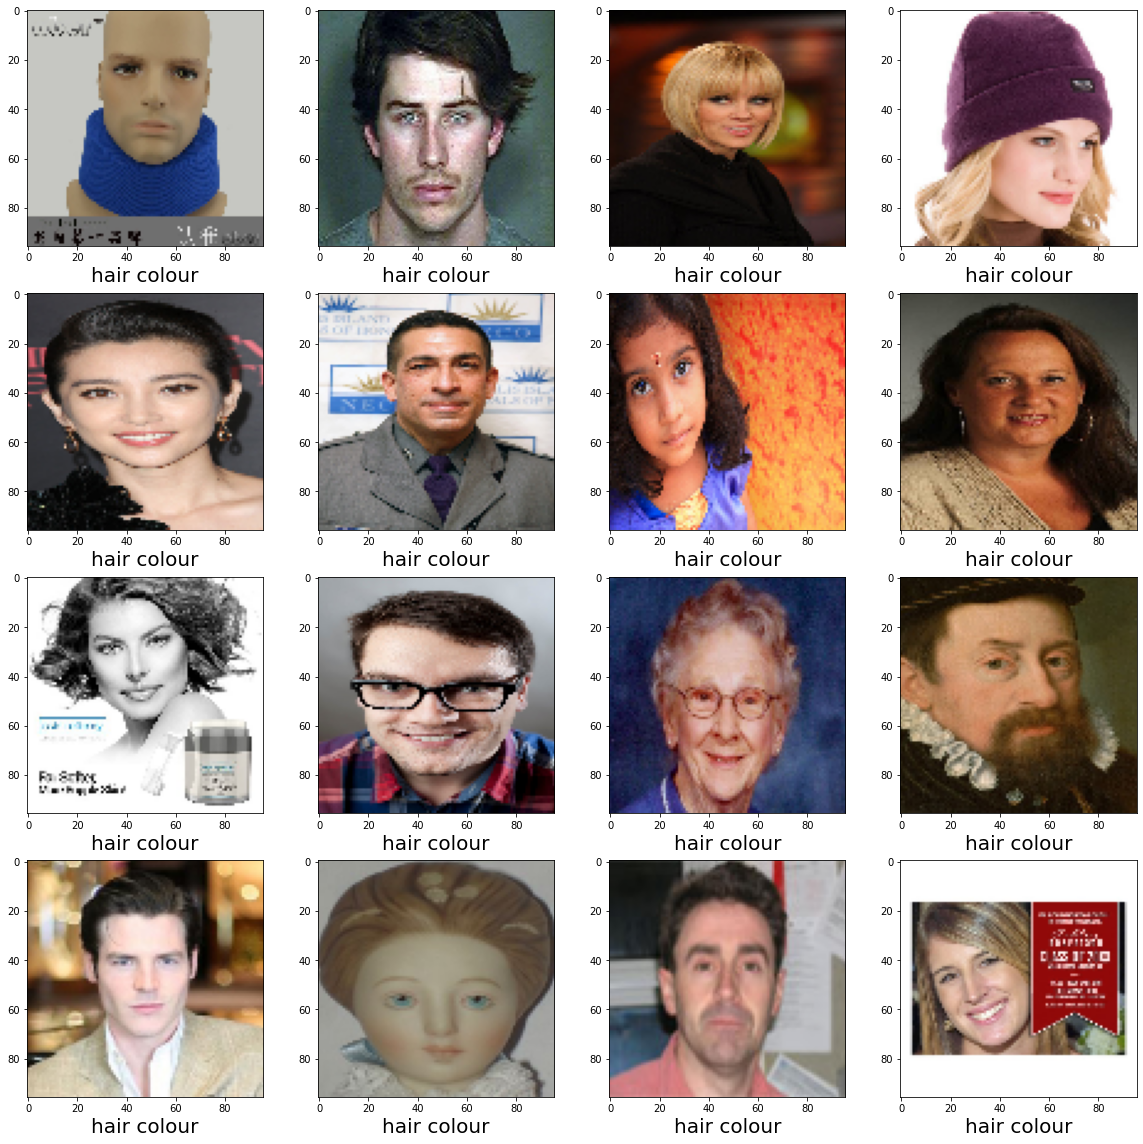

In [ ]:
#Randomly sampling the images 
import random
fig = plt.figure(figsize =[20,20])

for i in range(16):
  k = random.randint(1, len(df))
  ax =fig.add_subplot(4,4,i+1)
  image = plt.imshow(df['image'][k], cmap='gray')
  for j in range(1,31,2):
    (df.loc[i], df.loc[j], 'rx')
    plt.xlabel('hair colour', fontsize =20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   filename          3998 non-null   object
 1   wrinkles_class    3998 non-null   int64 
 2   freakles_class    3998 non-null   int64 
 3   glasses_class     3998 non-null   int64 
 4   hair_color_class  3998 non-null   int64 
 5   hair_top_class    3998 non-null   int64 
 6   not_human         3998 non-null   int64 
 7   image             3998 non-null   object
dtypes: int64(6), object(2)
memory usage: 250.0+ KB


In [ ]:
df[df['not_human']==0].count()

filename            3542
wrinkles_class      3542
freakles_class      3542
glasses_class       3542
hair_color_class    3542
hair_top_class      3542
not_human           3542
image               3542
dtype: int64

In [ ]:
#removing the non human images 
df = df[df['not_human']==0]
df[df['not_human']==1].sum()

filename            0.0
wrinkles_class      0.0
freakles_class      0.0
glasses_class       0.0
hair_color_class    0.0
hair_top_class      0.0
not_human           0.0
image               0.0
dtype: float64

In [ ]:
df.count()

filename            3542
wrinkles_class      3542
freakles_class      3542
glasses_class       3542
hair_color_class    3542
hair_top_class      3542
not_human           3542
image               3542
dtype: int64

In [ ]:
df.columns

Index(['filename', 'wrinkles_class', 'freakles_class', 'glasses_class',
       'hair_color_class', 'hair_top_class', 'not_human', 'image'],
      dtype='object')

In [ ]:
#dropping non human features, wrinkles, 'glasses_class', 'hair_color_class', 'hair_top_class' and 'not_human columns'
df_haircolour = df.drop(['filename', 'wrinkles_class','glasses_class', 'hair_top_class', 'freakles_class', 'not_human'], axis=1)
df_haircolour

,hair_color_class,image
0,1,"[[[164, 164, 166], [161, 161, 161], [164, 164,..."
1,1,"[[[40, 33, 29], [50, 37, 34], [56, 43, 38], [7..."
2,2,"[[[7, 8, 36], [8, 11, 37], [7, 11, 38], [9, 13..."
3,6,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...
3993,1,"[[[128, 132, 143], [115, 116, 124], [133, 135,..."
3994,1,"[[[92, 82, 217], [102, 100, 223], [124, 132, 2..."
3995,2,"[[[162, 138, 126], [162, 140, 130], [140, 120,..."
3996,3,"[[[190, 175, 120], [191, 176, 121], [191, 177,..."


In [ ]:
df_haircolour['hair_color_class'].unique()

array([1, 2, 6, 0, 4, 3, 5, 8, 7])

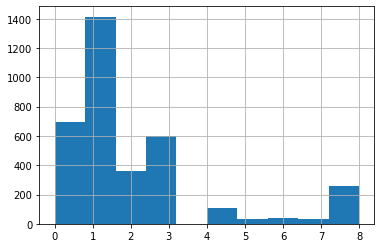

In [ ]:
#visualizing the freakles class 
df_haircolour['hair_color_class'].hist()

# **Preparing the data for Machine Learning algorithms**

In [ ]:
df = df_haircolour

In [ ]:
df.columns

Index(['hair_color_class', 'image'], dtype='object')

In [ ]:
X= df['image']
X = np.array(X.tolist())

In [ ]:
y = df['hair_color_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.2)

In [ ]:
from sklearn.utils import class_weight

class_weight =class_weight.compute_class_weight('balanced', np.unique(df['hair_color_class']), df['hair_color_class'])
print(class_weight)

[ 0.56383317  0.27832783  1.09320988  0.65374677  3.6780893  11.5751634
 10.35672515 12.6953405   1.52540913]


# **Model Selection and Training**

Using CNN to build the model

In [ ]:
INPUT_SHAPE = (96, 96, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(9))
model.add(Activation('softmax'))  

In [ ]:
model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 47, 47, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 45, 45, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0

In [ ]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


model.save('haircolur1.h5')  
model.save_weights('haircolourweight1.h5')  


Epoch 1/10
45/45 [==============================] - 32s 697ms/step - loss: 2.7533 - accuracy: 0.1522 - val_loss: 3.4702 - val_accuracy: 0.2468
Epoch 2/10
45/45 [==============================] - 31s 679ms/step - loss: 2.2102 - accuracy: 0.2748 - val_loss: 2.2316 - val_accuracy: 0.3427
Epoch 3/10
45/45 [==============================] - 31s 681ms/step - loss: 1.9905 - accuracy: 0.3368 - val_loss: 1.9534 - val_accuracy: 0.3921
Epoch 4/10
45/45 [==============================] - 31s 680ms/step - loss: 1.9188 - accuracy: 0.3473 - val_loss: 1.8162 - val_accuracy: 0.4076
Epoch 5/10
45/45 [==============================] - 31s 680ms/step - loss: 1.7560 - accuracy: 0.3730 - val_loss: 1.7440 - val_accuracy: 0.4260
Epoch 6/10
45/45 [==============================] - 31s 681ms/step - loss: 1.6810 - accuracy: 0.4156 - val_loss: 1.6913 - val_accuracy: 0.4288
Epoch 7/10
45/45 [==============================] - 31s 678ms/step - loss: 1.6201 - accuracy: 0.4481 - val_loss: 1.6577 - val_accuracy: 0.4302

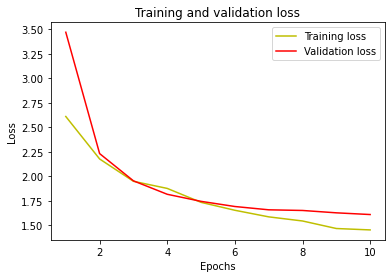

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

23/23 - 2s - loss: 1.6094 - accuracy: 0.4471
0.44710859656333923


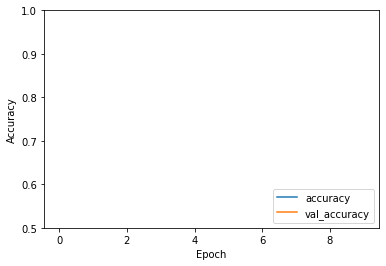

In [ ]:
# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

In [ ]:
INPUT_SHAPE = (96, 96, 3)   #change to (SIZE, SIZE, 3)


model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
# model.add(Dropout(0.2))

model2.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
# model.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
# model.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
# model.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(9))
model2.add(Activation('softmax'))  

In [ ]:
model2.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model2.summary() 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 45, 45, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)       

In [ ]:
class_weight_manual = { 0: 0.56383317, 1:  0.27832783,2:  1.09320988, 3:  0.65374677, 4:  3.6780893, 5: 11.5751634,
 6: 10.35672515, 7: 12.6953405,8: 1.52540913}

history = model2.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1,
                     class_weight= class_weight_manual, 
                         epochs = 10,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


model2.save('haircolour1withweights.h5')  

Epoch 1/10
45/45 [==============================] - 32s 689ms/step - loss: 3.0707 - accuracy: 0.1673 - val_loss: 3.6154 - val_accuracy: 0.0931
Epoch 2/10
45/45 [==============================] - 31s 680ms/step - loss: 2.4992 - accuracy: 0.1737 - val_loss: 2.7388 - val_accuracy: 0.0945
Epoch 3/10
45/45 [==============================] - 31s 681ms/step - loss: 2.4071 - accuracy: 0.1769 - val_loss: 2.6290 - val_accuracy: 0.1030
Epoch 4/10
45/45 [==============================] - 31s 684ms/step - loss: 2.2279 - accuracy: 0.1945 - val_loss: 2.4089 - val_accuracy: 0.1453
Epoch 5/10
45/45 [==============================] - 31s 684ms/step - loss: 2.0206 - accuracy: 0.1973 - val_loss: 2.3104 - val_accuracy: 0.1622
Epoch 6/10
45/45 [==============================] - 31s 681ms/step - loss: 1.9954 - accuracy: 0.2070 - val_loss: 2.2286 - val_accuracy: 0.1946
Epoch 7/10
45/45 [==============================] - 31s 682ms/step - loss: 1.8383 - accuracy: 0.2228 - val_loss: 2.1708 - val_accuracy: 0.2003

# **Fine tuning the model**

Oversampling

Since the data is largely imbalanced, oversampling is applied. 

In [ ]:
print((df['hair_color_class']==8).sum())
print((df['hair_color_class']==7).sum())
print((df['hair_color_class']==6).sum())
print((df['hair_color_class']==5).sum())
print((df['hair_color_class']==4).sum())
print((df['hair_color_class']==3).sum())
print((df['hair_color_class']==2).sum())
print((df['hair_color_class']==1).sum())
print((df['hair_color_class']==0).sum())

258
31
38
34
107
602
360
1414
698


In [ ]:
df_minority = df[df['hair_color_class']==2]
df_minority1 = df[df['hair_color_class']==0]
df_minority2 = df[df['hair_color_class']==3]
df_minority3 = df[df['hair_color_class']==4]
df_minority4 = df[df['hair_color_class']==5]
df_minority5 = df[df['hair_color_class']==6]
df_minority6 = df[df['hair_color_class']==8]
df_majority = df[df['hair_color_class']==1]
df_minority7 = df[df['hair_color_class']==7]

In [ ]:
df_minority_upsampled = resample(df_minority, replace =True, n_samples= 1000)
df_minority_upsampled1 = resample(df_minority1, replace =True, n_samples= 1000)
df_minority_upsampled2 = resample(df_minority2, replace =True, n_samples= 1000)
df_minority_upsampled3 = resample(df_minority3, replace =True, n_samples= 1000)
df_minority_upsampled4 = resample(df_minority4, replace =True, n_samples= 1000)
df_minority_upsampled5 = resample(df_minority5, replace =True, n_samples= 1000)
df_minority_upsampled6 = resample(df_minority6, replace =True, n_samples= 1000)
df_minority_upsampled7 = resample(df_minority7, replace =True, n_samples= 1000)

In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled,df_minority_upsampled1, df_minority_upsampled2, df_minority_upsampled3, df_minority_upsampled4,df_minority_upsampled5, df_minority_upsampled6,df_minority_upsampled7])

In [ ]:
print((df_upsampled['hair_color_class']==8).sum())
print((df_upsampled['hair_color_class']==7).sum())
print((df_upsampled['hair_color_class']==6).sum())
print((df_upsampled['hair_color_class']==5).sum())
print((df_upsampled['hair_color_class']==4).sum())
print((df_upsampled['hair_color_class']==3).sum())
print((df_upsampled['hair_color_class']==2).sum())
print((df_upsampled['hair_color_class']==1).sum())
print((df_upsampled['hair_color_class']==0).sum())

1000
1000
1000
1000
1000
1000
1000
1414
1000


In [ ]:
X= df_upsampled['image']

In [ ]:
X= X/255

In [ ]:
y= df_upsampled['hair_color_class']

In [ ]:
X = np.array(X.tolist())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

# **VGC with 10 epochs**


In [ ]:
INPUT_SHAPE = (96, 96, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(9))
model.add(Activation('softmax'))  

In [ ]:
model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary() 


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 45, 45, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 32)       

In [ ]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )



model.save('haircolur2.h5')  
model.save_weights('haircolourweight2.h5')  



Epoch 1/10
118/118 [==============================] - 81s 679ms/step - loss: 2.7901 - accuracy: 0.1687 - val_loss: 2.3116 - val_accuracy: 0.1259
Epoch 2/10
118/118 [==============================] - 80s 674ms/step - loss: 1.8619 - accuracy: 0.3631 - val_loss: 2.2935 - val_accuracy: 0.1545
Epoch 3/10
118/118 [==============================] - 82s 692ms/step - loss: 1.5615 - accuracy: 0.4815 - val_loss: 2.0709 - val_accuracy: 0.2177
Epoch 4/10
118/118 [==============================] - 81s 691ms/step - loss: 1.3618 - accuracy: 0.5525 - val_loss: 1.7014 - val_accuracy: 0.4079
Epoch 5/10
118/118 [==============================] - 81s 690ms/step - loss: 1.2152 - accuracy: 0.6004 - val_loss: 1.2581 - val_accuracy: 0.6638
Epoch 6/10
118/118 [==============================] - 82s 692ms/step - loss: 1.1123 - accuracy: 0.6371 - val_loss: 0.9800 - val_accuracy: 0.7281
Epoch 7/10
118/118 [==============================] - 82s 693ms/step - loss: 1.0086 - accuracy: 0.6655 - val_loss: 0.8535 - val_ac

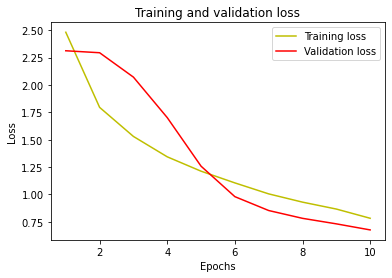

59/59 - 5s - loss: 0.6765 - accuracy: 0.7977
0.7976633310317993


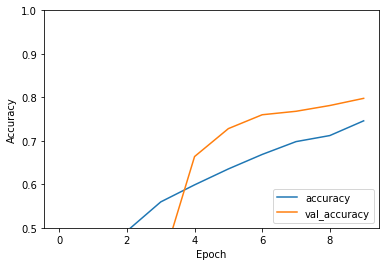

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

#**VGC 15 epochs**

In [ ]:
INPUT_SHAPE = (96, 96, 3)   #change to (SIZE, SIZE, 3)


model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
# model.add(Dropout(0.2))

model2.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
# model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
# model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
# model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
# model2.add(Dropout(0.5))

model2.add(Dense(9))
model2.add(Activation('softmax'))  

In [ ]:
model2.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model2.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 47, 47, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 45, 45, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 45, 45, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 32)       

In [ ]:
history = model2.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 15,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )



model2.save('haircolur3.h5')  
model2.save_weights('haircolourweight3.h5')  




Epoch 1/15
118/118 [==============================] - 82s 690ms/step - loss: 2.1869 - accuracy: 0.2613 - val_loss: 2.2854 - val_accuracy: 0.1354
Epoch 2/15
118/118 [==============================] - 79s 674ms/step - loss: 1.2796 - accuracy: 0.6002 - val_loss: 2.3071 - val_accuracy: 0.1588
Epoch 3/15
118/118 [==============================] - 80s 677ms/step - loss: 0.9566 - accuracy: 0.7119 - val_loss: 2.0964 - val_accuracy: 0.2347
Epoch 4/15
118/118 [==============================] - 80s 677ms/step - loss: 0.7538 - accuracy: 0.7822 - val_loss: 1.6099 - val_accuracy: 0.3935
Epoch 5/15
118/118 [==============================] - 80s 677ms/step - loss: 0.6104 - accuracy: 0.8321 - val_loss: 1.0089 - val_accuracy: 0.7074
Epoch 6/15
118/118 [==============================] - 80s 676ms/step - loss: 0.4997 - accuracy: 0.8718 - val_loss: 0.6947 - val_accuracy: 0.7908
Epoch 7/15
118/118 [==============================] - 80s 676ms/step - loss: 0.4123 - accuracy: 0.9046 - val_loss: 0.5757 - val_ac

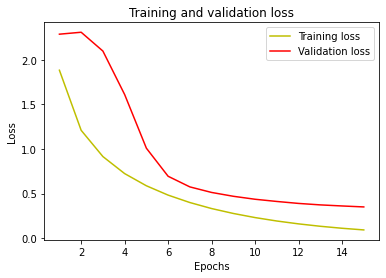

59/59 - 5s - loss: 0.3514 - accuracy: 0.8970
0.8969728946685791


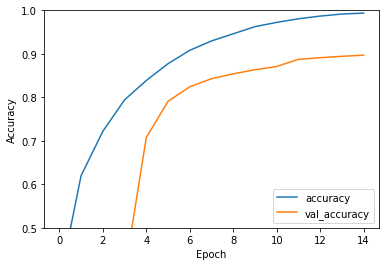

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

# **XGBOOST USING VGG16 FOR FEATURE EXTRACTION**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [ ]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0


#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(X_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features #This is our X input to RF


58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
______________________________________________________________

In [ ]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0


#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(X_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features #This is our X input to RF

#RANDOM FOREST
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

In [ ]:
train_images = X_train
train_labels = y_train

In [ ]:
test_images = X_test
test_labels = y_test


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels.ravel())
test_labels_encoded = le.transform(test_labels.ravel())
le.fit(train_labels.ravel())
train_labels_encoded = le.transform(train_labels.ravel())

In [ ]:

#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, y_train.ravel()) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(X_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)



In [ ]:
#Now predict using the trained RF model. 
prediction = model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

Accuracy =  0.8714816781731279


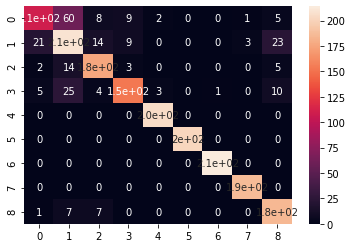

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  [2]
[0 = No hair, 1 = little hair, 2= Full hair, 3= No hair shown ]


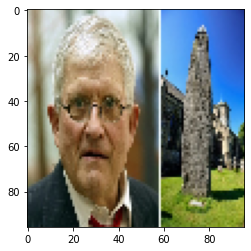

In [ ]:
#Check results on a few select images
n=np.random.randint(0, X_test.shape[0])
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print('[0 = No hair, 1 = little hair, 2= Full hair, 3= No hair shown ]')

In [ ]:
import pickle

In [ ]:
#save model
pickle.dump(model, open('modelhaircolour.pickle.dat', 'wb'))